## Decision Tree Examples

In [36]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Train and fine-tune a decision tree for the moons dataset

In [37]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=11)

X

array([[-0.08249495,  0.82027746],
       [ 0.46309398, -0.40897423],
       [ 1.47633062, -0.70893904],
       ...,
       [ 0.9566114 , -0.34046933],
       [ 0.46868755,  0.14314447],
       [-0.37721704,  0.21534513]])

In [38]:
def plot_binary_data_set(X, y):
    plt.figure(figsize=(8,4))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.show()

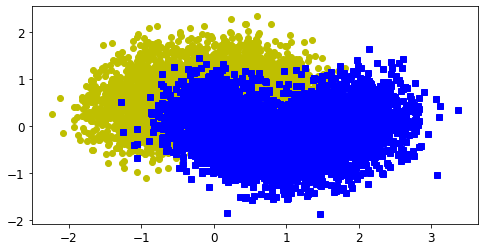

In [39]:
plot_binary_data_set(X, y)

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

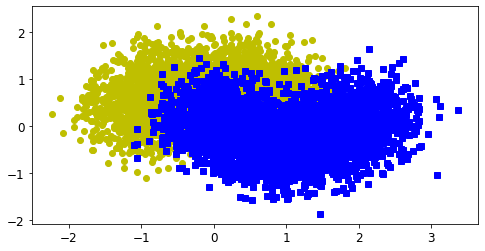

In [41]:
plot_binary_data_set(X_train, y_train)

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt_clf = DecisionTreeClassifier(random_state=11)
param_grid = {
    "criterion": [ "gini", "entropy" ],
    "max_leaf_nodes": [20, 40, 80, 160, 320, 640, 1280, 2560, 5120, None],
    "max_depth": [4, 6, 8, 10, 12, 14, 20, None],
    "min_samples_split": [2, 3, 4],
}

dt_clf_grid_search = GridSearchCV(dt_clf, param_grid, n_jobs=-1, verbose=1, cv=3)

In [48]:
dt_clf_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:    2.9s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=11,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                       

In [49]:
dt_clf_grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

In [50]:
from sklearn.metrics import accuracy_score

y_pred = dt_clf_grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.8615

In [51]:
y_pred = dt_clf_grid_search.predict(X_train)
accuracy_score(y_train, y_pred)

0.854875

### Grow a forest

In [61]:
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=1000, random_state=11, train_size=100)
split_sets = rs.split(X_train)

In [62]:
trained_dt_clfs = []

for s in split_sets:
    dt_clf = DecisionTreeClassifier(random_state=11, criterion="gini", max_leaf_nodes=17,
                       min_impurity_split=None )
#     print("train:", s[0], "size:", len(s[0]), "test:", len(s[1]))

train: [7548 3945  991  385  929 6596  264 7208 1452 4256 2158 4399 3210 6192
 4605 6162 5163 5393 5563  934 7258 4981 7999  275 5966 5792 6258 3400
 7748 5585 6871 5251 6145 1723 4323 7858 5813  133 1759 6392 1307  496
 7848 5056  335 6583 3335 3214 5365 4908 5147  441 5258 5483 3161 6982
 3995 3095 7776 3151 7293 3776 4338 1394 4779 1350 7747 4753 2552  408
 1115 3153 7636 1255 5621 7205 1866  140 6690 4996 2685 5356 3885 7584
 7933  688 5724 6765 3864 4946  583 5793  332 1293 4023 7505 7259 5200
 3775 1945] size: 100 test: 7900
train: [3682 6660 2983 5883 4034 3387 5318 5591 6442 1646 7884 3224  400  460
  688 5079 3291  371 2930  319 1525 2006 7526 1877 1502 3657 4896 4403
 7879 6121 3456 5731 1149 7093 7837 4154  777 7120  140 7943 3384 4525
 7062 7127 5393 6310 3056  608 6118 7849 6637 3772 2215 2099 1592 1275
 4261 2994 6075 4089 1298 4146 3252  689 7087 4147 5009 4029 2488 3374
 7869 2447 3400  230 6277 5277 5943  209 5834 6417 1740 2565 5030  577
 4914 5082 6164 7740 4852 6487

 6375 2479] size: 100 test: 7900
train: [4827 2179 3627 1234 5971 5566 3593  261 7056 6115 7815 6314 3466 5937
 6679 6882 5408  647 2541 2761 2338 3429 1723 2640 2527 7257 6435 2149
  575 3304 1346 4194 6383  712 7512 2305 6497 3938 5393 4609  249 4546
  591 6384  289 5096 6990 3749 6718 6050 5319 5010 3913 1439 3905 1999
 4939 6809 7405 6385 3063 2064 5296  343  463  436 7551 6232 1065 3200
  298   14 7559  879 4342 6968 7027 7032 4907 2975 4096 2848 6393 5274
 7604 2945 1934 7571 2362 4206 3482 1601 2795 3414 4277 5812 6997 2595
 2576  843] size: 100 test: 7900
train: [6845 1273 5484 7269 5705 6832 5247 6669 2953 6178 6656 1261 3222 7918
 3790 4938 4625  714 2854 7664 5928 7250  117 3575 2143 5889 7558 2839
 6226 2408  748 2547 1518 1303 1829 4127 1534 2148  845 6649 3129 5814
   74 3656 5837  200 4603 7122 5049 5992 4508 7193 4010 2805 1369 6071
 4328  357 5242  599 2716 1203 4727 7681 6889 5763 6167 6716 1384 5503
 6366 5298 6827 5109 1074 6133 7510 2940  441 4910  158 4171  129 70

 5088 5789] size: 100 test: 7900
train: [4462 3567 2756 5711 6271 7753 5961 2318 1792 3303 4482 7797 5340 6942
  912 1394 5289 4261 7225 4920 7766 5210 3990 4495  842 5239 7719 2263
   33 7841 4712 5324 6407 7056 6209 7600 2953 5592 3194 2789 7989 7573
 1906  348 3541  755 4917 4365  803 7900 5467 2008  836 3400 4959 3822
 3586 7637 2556  542 2226 2691 7087 4313 1473 1005 2365 2300 7729  133
 6401 1184  717 3273 2347 2298 4212  693  245 2784 2155 1429 2526 5723
 4831 3872 6272 1643 4165 1412 4544 3695 6103 7543  377 4679  690 7070
 4512 4336] size: 100 test: 7900
train: [4400 6330 5595 2397 6480 7843 5757 6271 4759 5028 7914 1430 5753 5067
 6153 2343 4845 1090 2555 7421 4043 6783 5749 1210  890 1543 2994 1334
  878 2471 7498 6946 4836 1552  262   95  929 5843 5005 7216  457 3766
 7384 2180 4707  177 3770 4249 7707  314 3962 3331 2835   89 2819 2082
 2168 6621 7473 5775 2253 7290 3566 7522  719 1892 6473  885 3726 5621
 5167 2346 2959 3917 6802 7094  418 5071 3365 2661 4363 6320 4078 49

train: [2756  181 1424 5267 5651 2749 1396 3223  864 4169 3926 5582 5585 7872
 3665  200 6650 4218 5302 7892 3880 5047 2468 3452 4668 4591 3841 5655
  756 6922 1414 1987 7668 1259 3984  982  610 2639 4875 7220 5653 6364
  842 3698 3076   10 3638 7321 2245 6493  678 4751  834 2099 5415 3204
 4321 5263  267 2472 6398 7241 4265 6443 1680 3569 4508 2257 7248 6875
 6329 4964 1984 2451 3924 2372 5864 2735 4482 4109 3286 6010  398 3087
 4621 4983 1899 1851 1303 1696 4106 1810 3043 7200 5780 7221 6591 4765
  414 4706] size: 100 test: 7900
train: [7883 7483 6722 5878 7214  332 5542 7344 2644 2131 1353 3083 2006 5372
 1325 7126  124 6861  661  449 3153  806 7461 3755 2063 1467 6790 1006
 4954 3251 3003 3310 3938 7007 2974 3811 5500  289 1451 5708 2577 1239
 5203 6789 1083 4917  752 6475 1344 4854 5747 7074 3097 6100 6567 3833
   87 7184 5568  571 2672 2389 3054  259 7310 2919 7891 7565 2422 5660
 4479 7800 6204 5229 2806 7615 5702 6807 1007 3950 1672 4767 5192 1245
 1791 4663  756 2592 3886 7244

train: [ 833 2581 3900 6365  889 2294 7863 2698   91 1065 1209 7704 1607 3496
 3312 6310 3804 6514 2174 2798 7232 7495  504 6416 7245 2290 5833 1792
 3518 3053 2046 7760 3271 7871  495  445  376 7965 4592 5219 5864 5040
 5333 7251 7326 7770  765 6789 3941 4489 4620 3593 5275 2268 3955 4486
 1757 1882 4650  680 1107 3008 4771 7661 3049   48 3356  611 4290 6201
 5960 5462  773 3966 7820 6082 6341 3373 4954 2806 2399 1338 2643 4860
 2780 5724 4870 7023 2493 1775  131 1946 4370 4957 4799 3399 4679 4201
 4874 5024] size: 100 test: 7900
train: [5540 5260 5848 5764 1155 4723 2869 6890 3440 1874 3448 7557 3762 1528
 1670 2606 1317 6972 2254 4242 7545 5225  684 6019 6488 2685 3013 5496
  512 2501 5278 4792 3311 1459 3862 4934 2632 5747 1349 6078  225 3980
 5351 3329   71 3018 2060 3250 4800 7442 6383 7542 6204 6084 6540  252
 4819  410 5624 6734 1132 3310 7501 5370 4885 3855 4518 7178 5617 4023
 3453 6582 4253 1834 3674   27  823 4010 5883 6933 4015 5537  670 3040
 3720 2121 1838 2938 2031 5503

train: [1070 4601 3990 2925  781 7324 7098 3268  212 1325 4113 1312  503 2986
 5014 1487  176 7306 3562 1880 6454 2544 6352 6835  283 4025 5675 2301
 3229 1498 5869 1526 2882  272 3463 2489  478 7430 2738 6629 5998 1080
 2007 7409 5315 5596 6405 6742 6180 7241 7672 7817 3706 5448 7089  279
 1763 5249 5356 2608 6748    1 5804 3988   35 6699 7351 6898 6393 1297
 6942 1978 7813 3884 7463 3479 6823 6200 3496 5738 6799 5117 1578 2769
 7191 3968 4058 1726 2237 7962 6575 1055 3899 3611 1820 6396 7564 7314
 3105 1019] size: 100 test: 7900
train: [  73 1978  301 1195 7085 4434 4400 5448 7567 2512 1068 4088 6366 6975
 3288 1085 4869 6072 2033 2285 5657 7205 4199   78 1259 7372 2098 7134
 2446 5419 3389  408 6426 7105 1182 2798 2776 3024 7401 3848 2840 4029
 3166 4130  959 2952 7658 1176 1899  625 5388 2730 4677  760 6998 4936
 4405 1041 1052 3609 4025 3077 2665 7801  787 1694 2471 2418 2026 4137
 2547 6498 3671 4704 2158 6833 6224 6661 1689 2296 2944 5368 3525 3897
 5777 2985 7252 4918 7058 6196